In [1]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob
import statsmodels.api as sm

#path = os.getcwd() 

path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"
appeals15 = pd.read_csv(path + "/appeals15.csv",index_col=None, header=0)

path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Sales_Ratios/1st_pass"
sales15 = pd.read_csv(path + "/res15.csv")

path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"
appeals14 = pd.read_csv(path + "/appeals14.csv",index_col=None, header=0)

path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Sales_Ratios/1st_pass"
sales14 = pd.read_csv(path + "/res14.csv")

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
## functions

def remove_dup_merge(df1_duplicates, df2, duplicate_cols, match_cols):
    """ use with sales_df, appeals_df, ["pin"], ["pin"] """
    
    df1_duplicates = df1_duplicates.drop_duplicates(duplicate_cols)
    merged = df2.merge(df1_duplicates, on = match_cols, how = "outer")
    
    return merged

def add_class_type_col(df, classif_column):
    """
    in appeals data, classification column = classification
    in sales data, classification column = bor_class
    """

    df["class_type"] = df[classif_column].apply(lambda x: str(x)[0])

def keep_2_5_only(df):
    final = df[(df["class_type"] == "2") | (df["class_type"] == "5")]
    
    return final

def analysis_year(year):
    # year == 
    path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"
    appeals = pd.read_csv(path + "/appeals%s.csv" %year ,index_col=None, header=0)

    path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Sales_Ratios/1st_pass"
    sales = pd.read_csv(path + "/res%s.csv" %year)

    df = remove_dup_merge(sales, appeals, ["pin"], ["pin"])

    ##  homes that SOLD but didn't appeal - no appealsnum
    a= df[pd.isnull(df['appealnum'])].shape

    ## pin10 is only in sales data,  that APPEALED ONLY - no pin10
    b = df[pd.isnull(df['pin10'])].shape

    df['matched'] = np.where((pd.notnull(df["p1_majclass"])) & (pd.notnull(df["appealnum"])), 1, 0)

    ## sold only 
    df['sold'] = np.where(pd.isnull(df["appealnum"]), 1, 0)

    print "median netconsideration appealed ", df[df['matched'] == 1]["NetConsideration"].median()
    print "median netconsideration sold ", df[df['sold'] == 1]["NetConsideration"].median()
    print "median p1_valratio appealed ", df[df['matched'] == 1]["p1_valratio"].median()
    print "median p1_valratio sold ", df[df['sold'] == 1]["p1_valratio"].median()
    


    #those who won have a bit higher sales ratio
    print "median netcons for lost / won ", df[df['matched'] == 1].groupby(["win"])["NetConsideration"].median()

    # those who won have a higher netconsideration
    print "median p1_valratio for lost / won ", df[df['matched'] == 1].groupby(["win"])["p1_valratio"].median()

    # those who won have a higher propoose_av
    print "count for lost / won ", df[df['matched'] == 1].groupby(["win"])["NetConsideration"].count()
    
    return df

In [3]:
path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"
files = glob.glob(path + "/*.csv")
frame = pd.DataFrame()

list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
appeals = pd.concat(list_)

print "DONE CONCATINATING ALL APPEALS"

DONE CONCATINATING ALL APPEALS


In [4]:
path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Sales_Ratios"
sales = pd.read_csv(path + "/sales_combined.csv")

In [103]:
from scipy.stats import gaussian_kde

# data = df15_2_5[df15_2_5['matched'] == 1]["bor_valratio"]
# density = gaussian_kde(data)
# print(density)
# plt.hist(d, bins = 10)
# plt.show()

# xs = np.linspace(0,1)
# density.covariance_factor = lambda : .25
# density._compute_covariance()
# plt.plot(xs,density(xs))

# data2 = df15_2_5[df15_2_5['matched'] == 1]["bor_valratio"]
# density2 = gaussian_kde(data2)
# # plt.hist(d, bins = 10)
# # plt.show()

# xs = np.linspace(0,1)
# density.covariance_factor = lambda : .25
# density._compute_covariance()
# plt.plot(xs,density2(xs))
# plt.show()

count    9563.000000
mean        0.810126
std         0.153734
min         0.345900
25%         0.719250
50%         0.806000
75%         0.898900
max         1.403400
Name: bor_valratio, dtype: float64


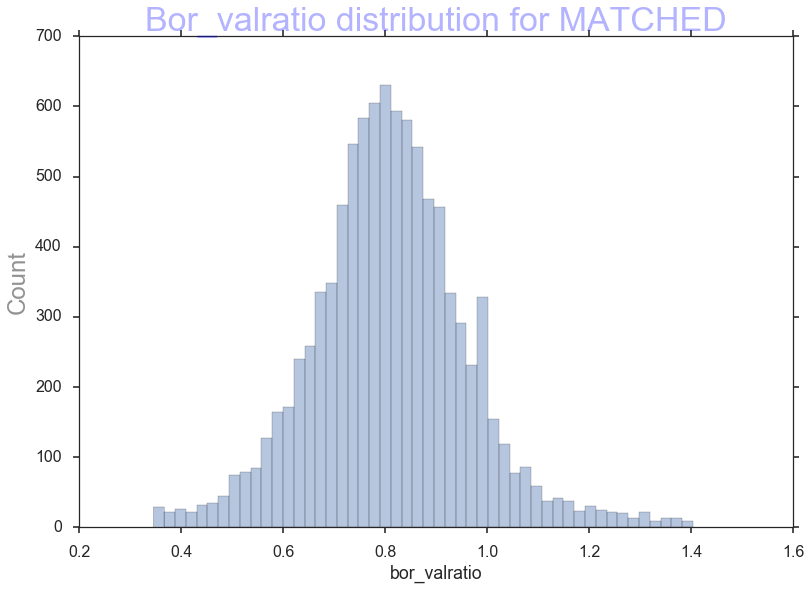

count    26763.000000
mean         0.874018
std          0.190623
min          0.345000
25%          0.745050
50%          0.867900
75%          0.997850
max          1.404500
Name: bor_valratio, dtype: float64


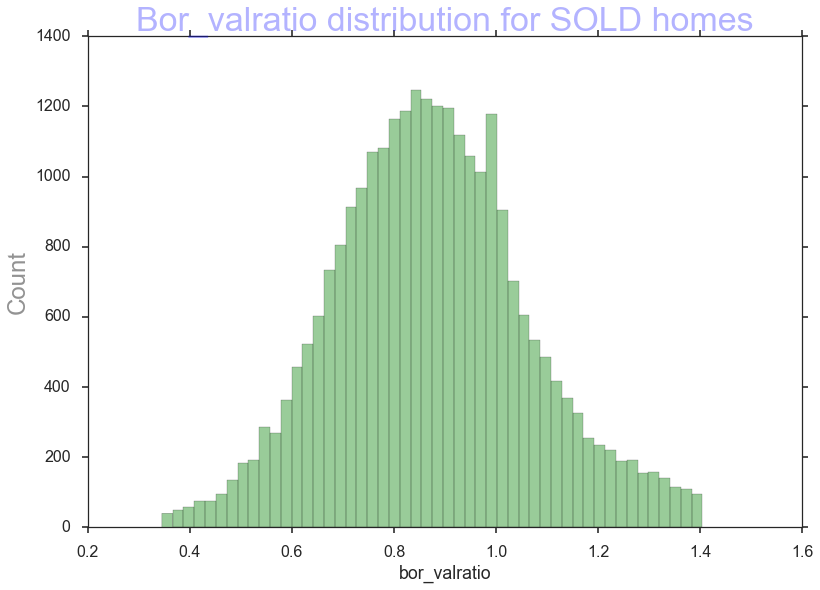

In [ ]:
data = df15_2_5[df15_2_5['matched'] == 1]["bor_valratio"]
print (data.describe())
sns.set_context("poster")
sns.set_style("ticks")

g = sns.distplot(data,kde=False, norm_hist=False)

g.axes.set_title('Bor_valratio distribution for MATCHED', fontsize=34,color="b",alpha=0.3)
g.set_ylabel("Count",size = 24,alpha=0.5)


In [14]:
df15_2_5.columns

Index([u'Unnamed: 0', u'pin', u'taxyear_x', u'appealnum', u'attorneytaxrep',
       u'prioir_av', u'proppose_av', u'assr_final', u'board_av', u'housenum',
       u'dir', u'street_name', u'street_suffix', u'city_name', u'zip',
       u'area_x', u'subarea', u'ass_win', u'bor_win', u'bor_rev', u'assr_rev',
       u'total_rev', u'classification', u'win', u'clean_name', u'X', u'pin10',
       u'NeighNum', u'Town', u'WARD', u'district_n', u'senatedist', u'TRI',
       u'joinyr', u'taxyear_y', u'bor_class', u'NetConsideration',
       u'bor_CCAO_ass', u'bor_ass_final', u'bor_val_final', u'TownNeigh',
       u'area_y', u'bor_majclass', u'bor_valratio', u'bor_assratio',
       u'class_type', u'matched', u'sold'],
      dtype='object')

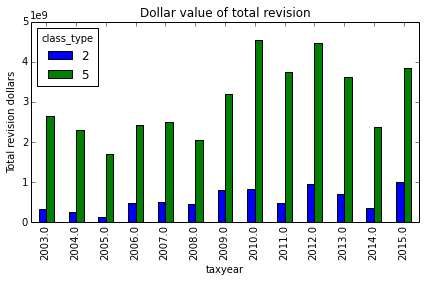

In [69]:
### total % value revision residential v. commercial
ax = df_2_5.groupby(['taxyear','class_type'])['total_rev'].sum().unstack().plot(kind = "bar", stacked=False, title="Dollar value of total revision")
ax.set_ylabel("Total revision dollars")

plt.tight_layout()
#plt.savefig(os.getcwd() + "/results/appeals-total_revision_value2-5.png")


In [61]:
# appealed == matched == 1
## asales ratio(bor_valratio) == 
# win == 1 versus win == 0 based on netconsideration, etc

#win versus lose, win / total
total_appeals = df15_2_5[df15_2_5['matched'] == 1].shape[0]
win_no = df15_2_5[(df15_2_5['matched'] == 1) & df15_2_5['win'] == 1].shape[0]

prob_win_2015 = win_no,total_appeals
print total_appeals
print win_no
print("prob winning in 2015::  %s" %0.857)
#df15_2_5.groupby(["win"])['total_rev']
#.sum().unstack().plot(kind = "bar", stacked=False, title="Dollar value of total revision")
#ax.set_ylabel("Total revision dollars")

#plt.tight_layout()
#plt.savefig(os.getcwd() + "/results/density-matched_bor_2015.png")



9563
8203
prob winning in 2015::  0.857


In [11]:
## vars but won / total

#those who won have a bit higher sales ratio
print df15_2_5[df15_2_5['matched'] == 1].groupby(["win"])["bor_valratio"].mean()[1]

print df15_2_5[df15_2_5['matched'] == 1]["bor_valratio"].mean()


0.812557893454
0.810126393391


In [8]:
df15 = analysis_year(15)

median netconsideration appealed  315000.0
median netconsideration sold  250000.0
median p1_valratio appealed  0.9044
median p1_valratio sold  0.8776
median netcons for lost / won  win
0    272500
1    319000
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.7914
1    0.9174
Name: p1_valratio, dtype: float64
count for lost / won  win
0    1360
1    8147
Name: NetConsideration, dtype: int64


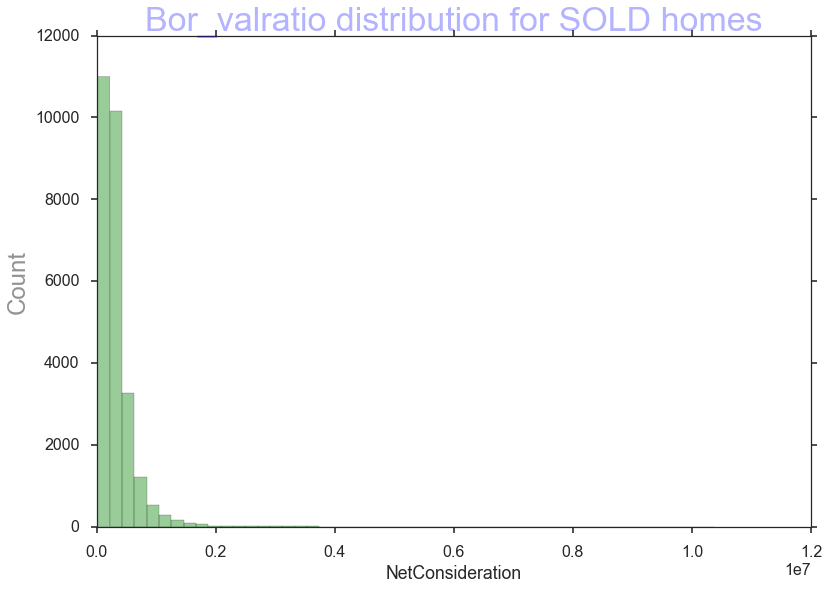

In [85]:
def plot_hist(df, variable):




    data = df[df['matched'] == 1][variable]
    sns.set_context("poster")
    sns.set_style("ticks")

    g = sns.distplot(data,kde=False, norm_hist=False, color = "green")

    g.axes.set_title('Bor_valratio distribution for SOLD homes', fontsize=34,color="b",alpha=0.3)
    g.set_ylabel("Count",size = 24,alpha=0.5)

    #g.set(xlim=(0, 2))
#     g.axes.set_title('Bor_valratio distribution for MATCHED', fontsize=34,color="b",alpha=0.3)
#     g.set_ylabel("Count",size = 24,alpha=0.5)

    #plt.savefig(os.getcwd() + "/results/density-matched_bor_2015.png")
    data2 = df[df['sold'] == 1][variable]

    #h = sns.distplot(data2,kde=False, norm_hist=False, color = "green")
    #h.set(xlim=(0, 2))
#     h.axes.set_title('Bor_valratio distribution for SOLD homes', fontsize=34,color="b",alpha=0.3)
#     h.set_ylabel("Count",size = 24,alpha=0.5)
    #plt.show()
#plot_hist(df15, "NetConsideration")
import seaborn as sns
data2 = df15[df15['sold'] == 1]["NetConsideration"]
sns.set_context("poster")
sns.set_style("ticks")

g = sns.distplot(data2,kde=False, norm_hist=False, color = "green")

g.axes.set_title('Bor_valratio distribution for SOLD homes', fontsize=34,color="b",alpha=0.3)
g.set_ylabel("Count",size = 24,alpha=0.5)
#plt.savefig(os.getcwd() + "/results/density-sold_bor_2015.png")


In [33]:
analysis_year(14)

median netconsideration appealed  280000.0
median netconsideration sold  256000.0
median p1_valratio appealed  0.8291
median p1_valratio sold  0.8507
median netcons for lost / won  win
0    313500
1    245000
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.74740
1    0.92655
Name: p1_valratio, dtype: float64
count for lost / won  win
0    1614
1    2244
Name: NetConsideration, dtype: int64


In [34]:
analysis_year(13)

median netconsideration appealed  226500.0
median netconsideration sold  253000.0
median p1_valratio appealed  0.947
median p1_valratio sold  0.9317
median netcons for lost / won  win
0    310500
1    202750
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.79805
1    0.99215
Name: p1_valratio, dtype: float64
count for lost / won  win
0    1708
1    5596
Name: NetConsideration, dtype: int64


In [35]:
analysis_year(12)

median netconsideration appealed  270000.0
median netconsideration sold  217000.0
median p1_valratio appealed  0.9967
median p1_valratio sold  1.0883
median netcons for lost / won  win
0    320000
1    265000
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.9061
1    1.0066
Name: p1_valratio, dtype: float64
count for lost / won  win
0     804
1    6344
Name: NetConsideration, dtype: int64


In [36]:
analysis_year(11)

median netconsideration appealed  280000.0
median netconsideration sold  207000.0
median p1_valratio appealed  1.02965
median p1_valratio sold  1.1225
median netcons for lost / won  win
0    275000
1    280000
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.96095
1    1.04505
Name: p1_valratio, dtype: float64
count for lost / won  win
0     532
1    2482
Name: NetConsideration, dtype: int64


In [37]:
analysis_year(10)

median netconsideration appealed  270000.0
median netconsideration sold  230000.0
median p1_valratio appealed  1.0483
median p1_valratio sold  1.0748
median netcons for lost / won  win
0    270000
1    270000
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.8663
1    1.0660
Name: p1_valratio, dtype: float64
count for lost / won  win
0     466
1    3770
Name: NetConsideration, dtype: int64


In [42]:
analysis_year("09")

median netconsideration appealed  293000.0
median netconsideration sold  230000.0
median p1_valratio appealed  0.9724
median p1_valratio sold  1.0968
median netcons for lost / won  win
0    300000
1    290750
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.87765
1    0.98815
Name: p1_valratio, dtype: float64
count for lost / won  win
0    1016
1    5302
Name: NetConsideration, dtype: int64


In [43]:
analysis_year("08")

median netconsideration appealed  295000.0
median netconsideration sold  270000.0
median p1_valratio appealed  0.6273
median p1_valratio sold  0.6233
median netcons for lost / won  win
0    324450
1    283500
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.53845
1    0.65190
Name: p1_valratio, dtype: float64
count for lost / won  win
0     488
1    1649
Name: NetConsideration, dtype: int64


In [44]:
analysis_year("07")

median netconsideration appealed  232500.0
median netconsideration sold  273000.0
median p1_valratio appealed  0.6166
median p1_valratio sold  0.55935
median netcons for lost / won  win
0    259500
1    229000
Name: NetConsideration, dtype: float64
median p1_valratio for lost / won  win
0    0.55635
1    0.62610
Name: p1_valratio, dtype: float64
count for lost / won  win
0    1008
1    3883
Name: NetConsideration, dtype: int64


In [22]:
## condos 2015

df15["classification"].isnull().sum()


26871

In [5]:
# % revision split by TRI / also count of appeals / sales only will be NA at join

### filter ONLY for % revision
df = remove_dup_merge(sales, appeals, ["pin"], ["pin"])
df = df[df["proppose_av"] != 0]
df["%_rev"] = df["total_rev"] / df["proppose_av"]

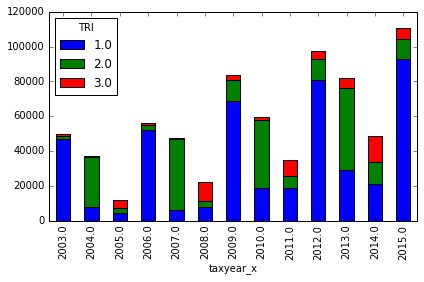

In [6]:
df.groupby(['taxyear_x','TRI']).size().unstack().plot(kind = "bar", stacked=True)
plt.tight_layout()
#plt.savefig(os.getcwd() + "/results/appeals-count-tri.png")

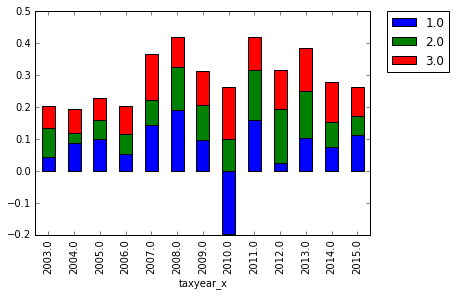

In [15]:
df.groupby(['taxyear_x','TRI']).mean()['%_rev'].unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
plt.savefig(os.getcwd() + "/results/appeals-%rev-tri.png")


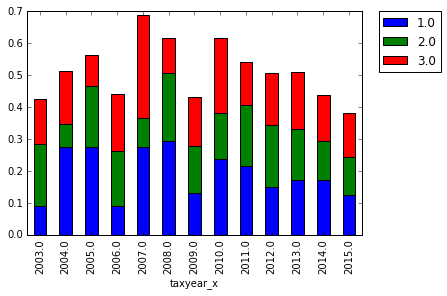

In [16]:

df_plot_win = df[(df["%_rev"] != 0) & (df["win"] == 1)]

df_plot_win.groupby(['taxyear_x','TRI']).mean()['%_rev'].unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.getcwd() + "/results/appeals-%rev-tri-win.png")

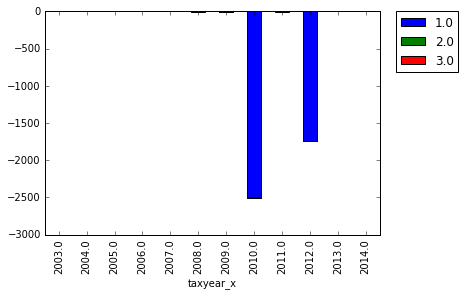

In [17]:

df_plot_lose = df[(df["%_rev"] != 0) & (df["win"] == 0)]

df_plot_lose.groupby(['taxyear_x','TRI']).mean()['%_rev'].unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.getcwd() + "/results/appeals-%rev-tri-lose.png")

In [ ]:
1